In [1]:
#Brownian motion
%matplotlib inline
import time
import random
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy
from scipy import stats

def curve2(r,sigma,mu): return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(r - mu)**2/(2*sigma**2))

def ABMfit(t,D,v,tau): return 4*D*t+v**2*tau**2/2*(2*t/tau+np.exp(-2*t/tau)-1)

def ABMfitshort(t,D,v): return 4*D*t+v**2*t**2

def ABMfitlong(t,D,v,tau): return (4*D+v**2*tau)*t

def linMSD(xpoints,minput): return minput * xpoints

def msd_1d(x):
    result = np.zeros_like(x)
    for i in range(1,len(x)): result[i] = np.average(pow(x[i:] - x[:-i],2))
    return result

def msd_1derr(x):
    result = np.zeros_like(x)
    for i in range(1,len(x)): result[i] = np.std(pow(x[i:] - x[:-i],2))/np.sqrt(len(x)+1)* stats.t.ppf(0.98,len(x))
    return result

def msd_2d(x,y):
    result = np.zeros_like(x)
    for i in range(1,len(x)): result[i] = np.average(pow(x[i:] - x[:-i],2)+pow(y[i:] - y[:-i],2))
    return result

def msd_2derr(x,y):
    result = np.zeros_like(x)
    for i in range(1,len(x)): result[i] = np.std(pow(x[i:] - x[:-i],2)+pow(y[i:] - y[:-i],2))/np.sqrt(len(x)+1)* stats.t.ppf(0.98,len(x))
    return result

In [12]:
np.random.seed(4) 
number_of_particles=1
dt=0.05
length=10000
diameter=2.19e-6
radius=diameter/2
kB = 1.38064852e-23
T = 273.15 + 20
eta=2.414e-5*10**(247.8/(T-140)) #eta=0.001
D_0 = kB*T/(6*np.pi*eta*radius)
prefactor=np.sqrt(2*D_0*dt)
print('eta = ',round(eta*1e3,3),'mPa*s')
print('D = ',round(D_0*1e12,3),'µm^2/s')

eta =  1.002 mPa*s
D =  0.196 µm^2/s


# Brownian motion

In [13]:
particles = np.zeros((length,number_of_particles,2))
timewave = np.linspace(0,length*dt,length,endpoint=False)
xsteps = np.zeros((length,number_of_particles))
ysteps = np.zeros((length,number_of_particles))
for i in range(number_of_particles):
    xsteps[:,i] = prefactor*np.random.normal(0,1,length)
    ysteps[:,i] = prefactor*np.random.normal(0,1,length)
for i in range(length):
    for k in range(number_of_particles):
        particles[i,k,0] = particles[i-1,k,0]+xsteps[i,k]    #[a][b][c]
        particles[i,k,1] = particles[i-1,k,1]+ysteps[i,k]    #a - step; b - #particle;c - x/y/angle

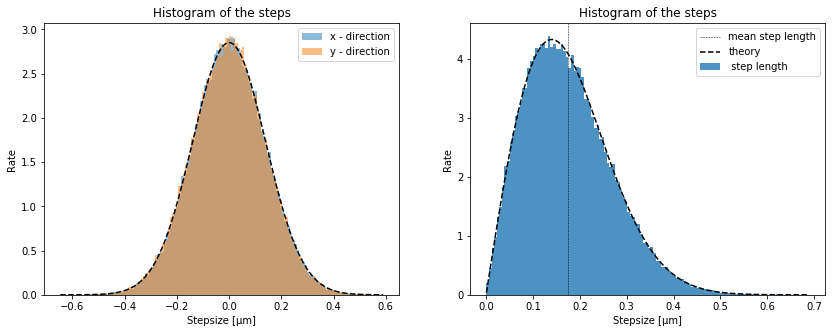

mean step size =  0.175  µm


In [14]:
sigma=prefactor
mu=0
steplength = np.sqrt(pow(xsteps[:,0],2)+pow(ysteps[:,0],2))

fig=plt.figure(1, figsize = (14,5) )
plt.subplot(1,2,1)
histo, bins, patches = plt.hist(xsteps[:,0]*1e6,bins='auto',density=1,label = 'x - direction',alpha = 0.5)
rscale=np.linspace(bins[0],bins[len(bins)-1],len(bins)) 
histo, bins, patches = plt.hist(ysteps[:,0]*1e6,bins=rscale,density=1,label = 'y - direction',alpha = 0.5)
plt.plot(rscale,curve2(rscale,sigma*1e6,mu*1e6),'k--',lw=1.5)
plt.title('Histogram of the steps')
plt.xlabel('Stepsize [µm]')
plt.ylabel('Rate')
plt.legend()

sigma = np.sqrt(2*D_0*1e12*dt)
plt.subplot(1,2,2)
histo, bins, patches = plt.hist(steplength*1e6,bins='auto',density=1,label = ' step length',alpha = 0.8)
plt.axvline(x=np.mean(steplength)*1e6,linewidth=0.5, color = 'k',linestyle='--',label='mean step length')
rscale2=np.linspace(bins[0],bins[len(bins)-1],len(bins)) 
plt.plot(rscale2,rscale2/sigma**2*np.exp(-rscale2**2/(2*sigma**2)),'k--',lw=1.5,label='theory')
plt.title('Histogram of the steps')
plt.xlabel('Stepsize [µm]')
plt.ylabel('Rate')
plt.legend()
plt.show()

meanstepsize = np.mean(steplength)
print('mean step size = ',round(meanstepsize*1e6,3),' µm')

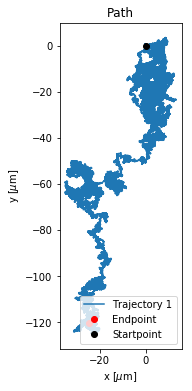

In [15]:
fig=plt.figure(1, figsize = (6,6) )
ax =plt.subplot(1,1, 1)
for i in range(number_of_particles): plt.plot(particles[:,i,0]*1e6,particles[:,i,1]*1e6,label='Trajectory '+str(i+1))    
for i in range(number_of_particles): plt.plot(particles[length-1,i,0]*1e6,particles[length-1,i,1]*1e6,'ro',label = 'Endpoint')
plt.plot(0,0,'ko',label = 'Startpoint')
plt.xlabel('x [$\mu$m]')
plt.ylabel('y [$\mu$m]')
plt.title('Path')
ax.set_aspect('equal')
plt.legend()
plt.show()

--- 53.46 seconds ---


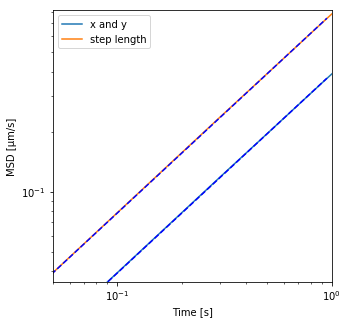

Input D  =  0.196 m^2/s
Alex Dxy =  0.195 +- 0.0 m^2/s
Alex Dr  =  0.195 +- 0.0 m^2/s


In [16]:
start_time = time.time() 
result1 = msd_1d(particles[:,0,0])
result2 = msd_1d(particles[:,0,1])
result3 = msd_2d(particles[:,0,0],particles[:,0,1])
#result1err = msd_1derr(particles[:,0,0])
#result2err = msd_1derr(particles[:,0,1])
#meanresulterr = (result1err+result2err)/2
meanresult = (result1+result2)/2
print("--- %s seconds ---" % round((time.time() - start_time),2))

fig=plt.figure(1, figsize = (5,5) )
plotlength = 1
plotlength2 = int(min(len(meanresult),plotlength/dt))
plt.loglog(timewave,meanresult*1e12,label='x and y')
#plt.fill_between(timewave, (meanresult + meanresulterr)*1e12, (meanresult - meanresulterr)*1e12,color='k', alpha = 0.2)
popt,pcov = curve_fit(linMSD, timewave[:plotlength2], meanresult[:plotlength2],p0 = (D_0*1e12))
#popt,pcov = curve_fit(linMSD, timewave[:plotlength2], meanresult[:plotlength2], sigma = meanresulterr[:plotlengt], absolute_sigma=True, p0 = (D_0*1e12))
pErr = np.sqrt(np.diag(pcov))
AlexDxy = popt; AlexDerrxy = pErr
plt.plot(timewave[:plotlength2],linMSD(timewave[:plotlength2]*1e12,*popt),linestyle='--',c='b',linewidth=1.5)
plt.loglog(timewave,result3*1e12,label='step length')
popt,pcov = curve_fit(linMSD, timewave[:plotlength2], result3[:plotlength2],p0 = (D_0*1e12))
pErr = np.sqrt(np.diag(pcov))
AlexDr = popt; AlexDerrr = pErr
plt.plot(timewave[:plotlength2],linMSD(timewave[:plotlength2]*1e12,*popt),linestyle='--',c='b',linewidth=1.5)
plt.xlabel('Time [s]')
plt.ylabel('MSD [µm/s]')    
plt.xlim([dt,plotlength])
plt.ylim([0.9*min(result3[1:plotlength2])*1e12,1.1*max(result3[:plotlength2])*1e12])
plt.legend()
plt.show()

print('Input D  = ',round(D_0*1e12,3),'m^2/s')
print('Alex Dxy = ',round(AlexDxy[0]*1e12/2,3),'+-',round(AlexDerrxy[0]/2,5),'m^2/s')
print('Alex Dr  = ',round(AlexDr[0]*1e12/4,3),'+-',round(AlexDerrr[0]/4,5),'m^2/s')

# Active Brownian motion

In [63]:
vavg = 6e-6
vsigma = 0.5e-6
anglesigma = 15

particles2 = np.zeros((length,number_of_particles,3))
vsteps = np.zeros((length,number_of_particles))
for i in range(number_of_particles): vsteps[:,i] = vsigma*np.random.normal(0,1,length)+vavg
anglesteps = np.zeros((length,number_of_particles))
if anglesigma != 0: 
    for i in range(number_of_particles): anglesteps[:,i] = anglesigma*np.random.normal(0,1,length)
        
for i in range(number_of_particles):
    xsteps[:,i] = prefactor*np.random.normal(0,1,length)
    ysteps[:,i] = prefactor*np.random.normal(0,1,length)

particles2[0,:,2] = np.random.uniform(0,360,number_of_particles)
for i in range(number_of_particles):
    for j in range(1,length): particles2[j,i,2] = particles2[j-1,i,2] + anglesteps[j,i]

totalxstep = np.zeros((length,number_of_particles))
totalystep = np.zeros((length,number_of_particles))
activexstep = np.zeros((length,number_of_particles))
activeystep = np.zeros((length,number_of_particles))
for i in range(1,length):
#for i in range(1,10):
    for k in range(number_of_particles):
        #print('active = ',round(vsteps[i,k]*dt*np.cos(particles2[i,k,2]*np.pi/180)*1e6,2),' - BM = ',round(xsteps[i,k]*1e6,2))
        activexstep[i,k] = vsteps[i,k]*dt*np.cos(particles2[i,k,2]*np.pi/180)
        activeystep[i,k] = vsteps[i,k]*dt*np.sin(particles2[i,k,2]*np.pi/180)
        totalxstep[i,k] = activexstep[i,k] + xsteps[i,k]
        totalystep[i,k] = activeystep[i,k] + ysteps[i,k]
        particles2[i,k,0] = particles2[i-1,k,0]+totalxstep[i,k]    #[a][b][c]
        particles2[i,k,1] = particles2[i-1,k,1]+totalystep[i,k]    #a - step; b - #particle;c - x/y/angle
        
print('mean BM step size =',round(np.mean(np.sqrt(pow(xsteps[:,0],2)+pow(ysteps[:,0],2)))*1e6,2),' µm')
print('mean active step  =',round(np.mean(np.sqrt(pow(activexstep[:,0],2)+pow(activeystep[:,0],2)))*1e6,2),' µm')

mean BM step size = 0.18  µm
mean active step  = 0.3  µm


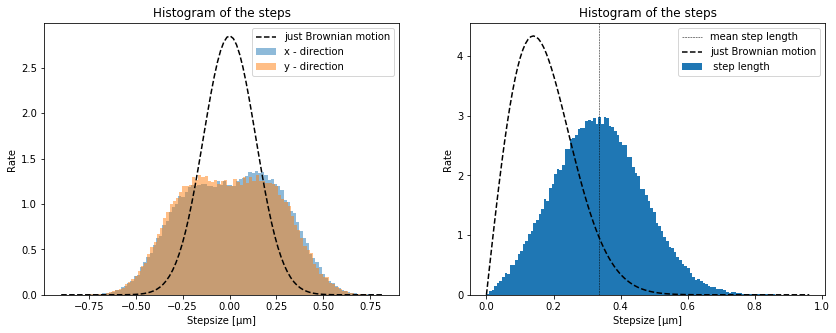

mean velocity =  0.335  µm/s


In [64]:
sigma=prefactor
mu=0
activesteplength = np.sqrt(pow(totalxstep[:,0],2)+pow(totalystep[:,0],2))

fig=plt.figure(1, figsize = (14,5) )
plt.subplot(1,2,1)
histo, bins, patches = plt.hist(totalxstep[:,0]*1e6,bins='auto',normed=1,label = 'x - direction',alpha = 0.5)
histo, bins, patches = plt.hist(totalystep[:,0]*1e6,bins='auto',normed=1,label = 'y - direction',alpha = 0.5)
plt.plot(bins,curve2(bins,sigma*1e6,mu*1e6),'k--',lw=1.5,label='just Brownian motion')
plt.title('Histogram of the steps')
plt.xlabel('Stepsize [µm]')
plt.ylabel('Rate')
plt.legend()

plt.subplot(1,2,2)
histo, bins, patches = plt.hist(activesteplength*1e6,bins='auto',normed=1,label = ' step length')
rscale=np.linspace(bins[0],bins[len(bins)-1],len(bins)) 
plt.plot(rscale,curve2(rscale,vsigma*1e6,vavg*1e6),'k--',lw=1)
plt.axvline(x=np.mean(activesteplength)*1e6,linewidth=0.5, color = 'k',linestyle='--',label='mean step length')
sigma = np.sqrt(2*D_0*1e12*dt)
plt.plot(rscale,rscale/sigma**2*np.exp(-rscale**2/(2*sigma**2)),'k--',lw=1.5,label='just Brownian motion')
plt.title('Histogram of the steps')
plt.xlabel('Stepsize [µm]')
plt.ylabel('Rate')
plt.legend()
plt.show()

activemeansteplength = np.mean(activesteplength)
print('mean velocity = ',round(activemeansteplength*1e6,3),' µm/s')

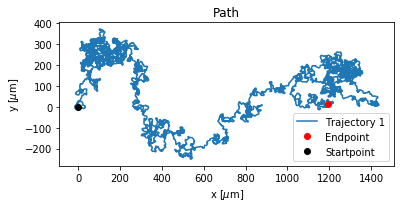

In [65]:
fig=plt.figure(1, figsize = (6,6) )
ax =plt.subplot(1,1, 1)
for i in range(number_of_particles): plt.plot(particles2[:,i,0]*1e6,particles2[:,i,1]*1e6,label='Trajectory '+str(i+1))    
for i in range(number_of_particles): plt.plot(particles2[length-1,i,0]*1e6,particles2[length-1,i,1]*1e6,'ro',label = 'Endpoint')
ax.plot(0,0,'ko',label = 'Startpoint')
plt.xlabel('x [$\mu$m]')
plt.ylabel('y [$\mu$m]')
plt.title('Path')
ax.set_aspect('equal')
plt.legend()
plt.show()

In [66]:
    newangle = np.zeros(length); newangle = particles2[:,0,2].copy()    #MSD for the theoretic moving direction
    diff = np.zeros(3)
    for i in range(1,length):
        diff[0] = abs(newangle[i]-newangle[i-1])
        diff[1] = abs(newangle[i]-newangle[i-1]+360)
        diff[2] = abs(newangle[i]-newangle[i-1]-360)
        mini = min(diff)
        if mini != diff[0]:
            if mini == diff[1]: newangle[i:] += 360
            else: newangle[i:] -= 360

    check = True; i = 1
    reorwave= np.zeros((length,2))
    while check == True:
        diff = np.zeros(length-i)
        for j in range(i,length): diff[j-i] = abs(newangle[j] - newangle[j-i])  #Calculate the direction change for i steps
        mean = np.mean(diff[:length-i])   #Calculate the standard derivation
        reorwave[i,0] = i*dt
        reorwave[i,1] = mean
        if mean/57.3 >= 1: 
            check = False
            reorlen = i
        else: i += 1 
        if i == length:
            reorlen = i
            i = 666/dt
            check = False       
    reorientationtime = i*dt 
    
    print(reorientationtime)

1.1500000000000001


In [73]:
print(meanresult)
print(meanresulterr**2)

[  0.00000000e+00   1.29726404e-13   4.33065901e-13 ...,   1.42225425e-06
   1.42229976e-06   1.42250602e-06]
[  0.00000000e+00   3.72908684e-31   2.67362607e-30 ...,   1.54432064e-23
   1.23245467e-23   0.00000000e+00]


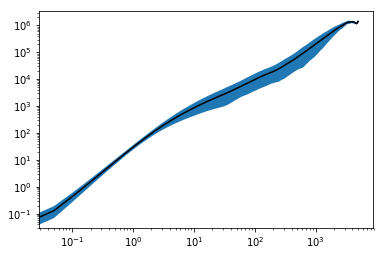

In [76]:
plt.loglog(timewave,meanresult*1e12,c='k')
plt.fill_between(timewave,(meanresult-100*meanresulterr)*1e12,(meanresult+100*meanresulterr)*1e12)

--- 0.0 seconds ---


/Users/alex/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


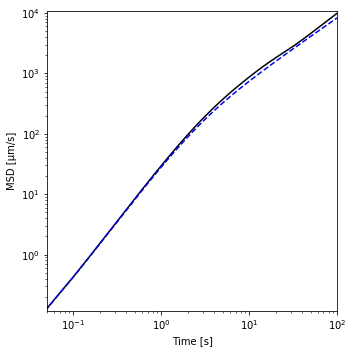

My Fit: D =  0.2 µm^2/s - v =  6.0 µm/s - tau =  2.3 s
Input:  D =  0.2 µm^2/s - v =  6.0 µm/s - tau =  1.15 s


In [88]:
#print('Input D = ',round(D_0*1e12,3))
#taur = 8*np.pi*eta*radius**3/kB*T

start_time = time.time() 
#meanresult = msd_2d(particles2[:,0,0],particles2[:,0,1])
#meanresulterr = msd_2derr(particles2[:,0,0],particles2[:,0,1])
print("--- %s seconds ---" % round((time.time() - start_time),2))

plotlength = 100#int(2/(anglesigma*dt))
fig=plt.figure(1, figsize = (5,5) )
plt.loglog(timewave,meanresult*1e12,c='k')
#popt,pcov = curve_fit(ABMfit, timewave[:int(plotlength/dt)], meanresult[:int(plotlength/dt)],p0 = (D_0,vavg,reorientationtime))
#popt,pcov = curve_fit(ABMfit, timewave[:int(plotlength/dt)], meanresult[:int(plotlength/dt)], sigma = 100*meanresulterr[:int(plotlength/dt)],p0 = (D_0,vavg,reorientationtime))
popt,pcov = curve_fit(ABMfit, timewave[:int(plotlength/dt)], meanresult[:int(plotlength/dt)], sigma = 1*meanresult[:int(plotlength/dt)],p0 = (D_0,vavg,reorientationtime))

pErr = np.sqrt(np.diag(pcov))
plt.plot(timewave[:int(plotlength/dt)],ABMfit(timewave[:int(plotlength/dt)],*popt)*1e12,linestyle='--',c='b',linewidth=1.5)
plt.xlabel('Time [s]')
plt.ylabel('MSD [µm/s]')    
plt.xlim([dt,plotlength])
plt.ylim([0.9*min(meanresult[1:int(plotlength/dt)])*1e12,1.1*max(meanresult[:int(plotlength/dt)])*1e12])
plt.tight_layout() 
plt.show()

print('My Fit: D = ',round(popt[0]*1e12,2),'µm^2/s - v = ',round(popt[1]*1e6,2),'µm/s - tau = ',round(popt[2],5),'s')
print('Input:  D = ',round(D_0*1e12,2),'µm^2/s - v = ',round(vavg*1e6,2),'µm/s - tau = ',round(reorientationtime,2),'s')

/Users/alex/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


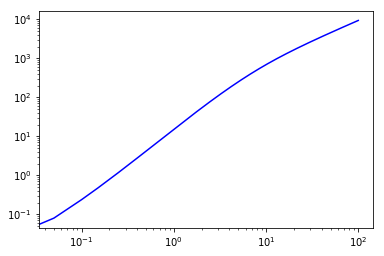

In [60]:
ende = 100/dt
plt.loglog(timewave[:ende],ABMfit(timewave[:ende],0.2e-12,4e-6,6)*1e12,c='b',linewidth=1.5)

/Users/alex/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


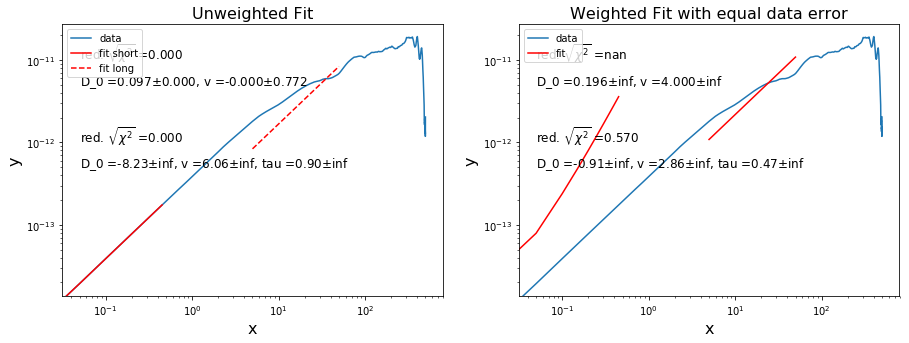

In [589]:
#Random data generation
plotlength = 5#int(0.8*len(meanresult))
xdata = timewave
ydata = meanresult
yerror = meanresulterr
endshort = int(5/(anglesigma*dt))
startlong = int(50/(anglesigma*dt))
endlong = int(50/dt)

#unweighted fit
popt,pcov = curve_fit(ABMfitshort, xdata[:endshort], ydata[:endshort],p0 = (D_0,vavg))
pErr = np.sqrt(np.diag(pcov))
r,redchi2 = chi2(ydata[:endshort],2,ABMfitshort,xdata[:endshort],*popt)

fig=plt.figure(1, figsize = (15,5) )
plt.subplot(1, 2, 1)
plt.loglog(xdata,ydata,label='data')
plt.plot(xdata[:endshort],ABMfitshort(xdata[:endshort],*popt),'r-',label='fit short')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Unweighted Fit',fontsize = 16)
plt.text(0.05,1e-11,"red. $\sqrt{\chi^2}$"+" ={:.3f}".format(np.sqrt(redchi2)),fontsize=12)
plt.text(0.05,5e-12,'D_0 ={:.3f}$\pm${:.3f}, v ={:.3f}$\pm${:.3f}'.format(popt[0]*1e12,pErr[0]*1e12,popt[1]*1e6,pErr[1]*1e6),fontsize=12)

popt,pcov = curve_fit(ABMfitlong, xdata[startlong:endlong], ydata[startlong:endlong],p0 = (D_0,vavg,1))
pErr = np.sqrt(np.diag(pcov))
r,redchi2 = chi2(ydata[startlong:endlong],3,ABMfitlong,xdata[startlong:endlong],*popt)
plt.plot(xdata[startlong:endlong],ABMfitlong(xdata[startlong:endlong],*popt),'r--',label='fit long')
plt.text(0.05,1e-12,"red. $\sqrt{\chi^2}$"+" ={:.3f}".format(np.sqrt(redchi2)),fontsize=12)
plt.text(0.05,5e-13,'D_0 ={:.2f}$\pm${:.2f}, v ={:.2f}$\pm${:.2f}, tau ={:.2f}$\pm${:.2f}'.format(popt[0]*1e12,pErr[0]*1e12,popt[1]*1e6,pErr[1]*1e6,popt[2],pErr[2]),fontsize=12)

#weighted fit
popt,pcov = curve_fit(ABMfitshort, xdata[:endshort], ydata[:endshort], sigma = yerror[:endshort], p0 = (D_0,vavg))
r,redchi2 = chi2abs(ydata[:endshort],yerror[:endshort],2,ABMfitshort,xdata[:endshort],*popt)
pErr = np.sqrt(np.diag(pcov))#*np.sqrt(redchi2)
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(xdata,ydata,label='data')
plt.plot(xdata[:endshort],ABMfitshort(xdata[:endshort],*popt),'r-',label='fit')
plt.legend()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Weighted Fit with equal data error',fontsize = 16)
plt.text(0.05,1e-11,"red. $\sqrt{\chi^2}$"+" ={:.3f}".format(np.sqrt(redchi2)),fontsize=12)
plt.text(0.05,5e-12,'D_0 ={:.3f}$\pm${:.3f}, v ={:.3f}$\pm${:.3f}'.format(popt[0]*1e12,pErr[0]*1e12,popt[1]*1e6,pErr[1]*1e6),fontsize=12)

popt,pcov = curve_fit(ABMfitlong, xdata[startlong:endlong], ydata[startlong:endlong], sigma = yerror[startlong:endlong], p0 = (D_0,vavg,1))
r,redchi2 = chi2abs(ydata[startlong:endlong],yerror[startlong:endlong],3,ABMfitlong,xdata[startlong:endlong],*popt)
pErr = np.sqrt(np.diag(pcov))#*np.sqrt(redchi2)
plt.plot(xdata[startlong:endlong],ABMfitlong(xdata[startlong:endlong],*popt),'r-',label='fit')
plt.text(0.05,1e-12,"red. $\sqrt{\chi^2}$"+" ={:.3f}".format(np.sqrt(redchi2)),fontsize=12)
plt.text(0.05,5e-13,'D_0 ={:.2f}$\pm${:.2f}, v ={:.2f}$\pm${:.2f}, tau ={:.2f}$\pm${:.2f}'.format(popt[0]*1e12,pErr[0]*1e12,popt[1]*1e6,pErr[1]*1e6,popt[2],pErr[2]),fontsize=12)
plt.show()